In [ ]:
Визуализация данных

Ананикян Тигран ИУ10-56, Вариант - 1, База данных - https://archive.ics.uci.edu/dataset/42/glass+identification

Цель работы

Изучение программных средств для визуализации наборов данных.

Задачи

изучение основных типов графиков библиотеки matplotlib;
изучение основных типов графиков библиотеки seaborn;
получение навыков анализа данных по визуальным представлениям данных.


In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data_path = "glass.data"
data = pd.read_csv(data_path)
data.head(10)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [5]:
data.columns

Index(['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75',
       '0.00', '0.00.1', '1.1'],
      dtype='object')

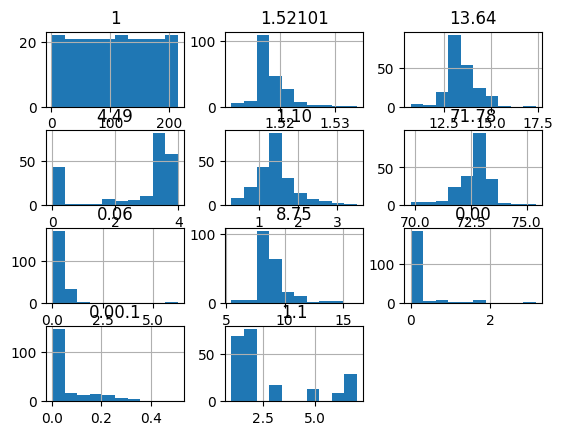

In [6]:
data.hist();

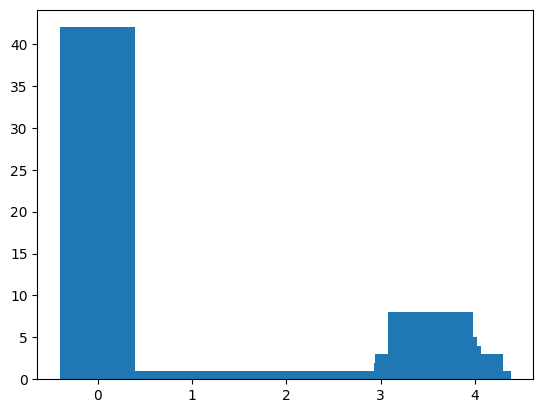

In [7]:
hist = data['4.49'].value_counts()
plt.bar(hist.index, hist);

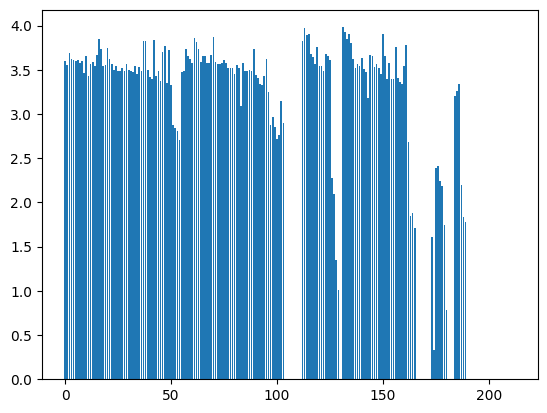

In [8]:
plt.bar(data.index, data['4.49'])
plt.show()

<Axes: ylabel='4.49'>

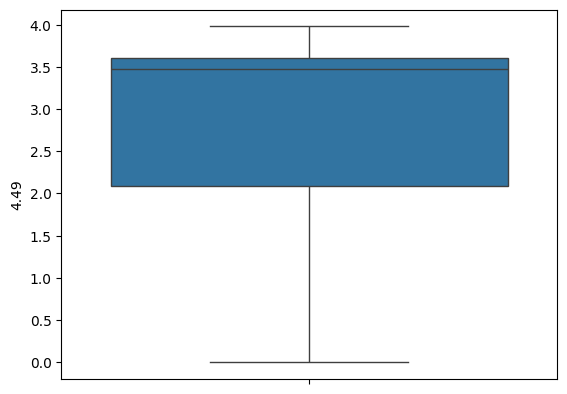

In [9]:
sns.boxplot(data['4.49'])

/var/folders/cn/109rk8k11jgfxmmjzw282t1w0000gn/T/ipykernel_3584/2976493223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_data['1'] = pd.to_numeric(top_data['1.1'], errors='coerce')
/var/folders/cn/109rk8k11jgfxmmjzw282t1w0000gn/T/ipykernel_3584/2976493223.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='4.49', x='1.1', data=data[data['1.1'].isin(top_data)], palette='Set2')


<Axes: xlabel='1.1', ylabel='4.49'>

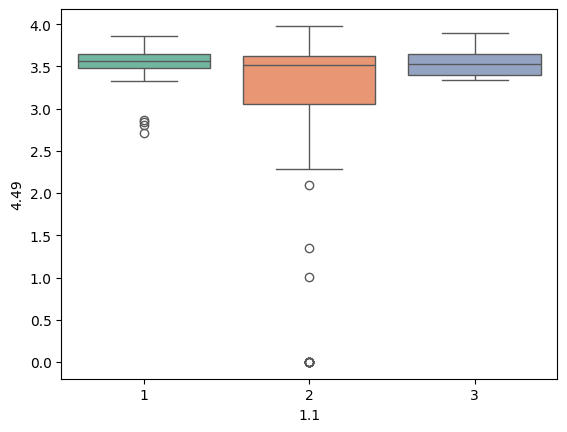

In [27]:
top_data = data[['1.1', '4.49']]

# Преобразование столбца '1' в числовой формат
top_data['1'] = pd.to_numeric(top_data['1.1'], errors='coerce')

# Группировка и сортировка
top_data = top_data.groupby('1.1').sum().sort_values('4.49', ascending=False)

# Выбор топ 3 значений
top_data = top_data[:3].index.values

# Отрисовка boxplot
sns.boxplot(y='4.49', x='1.1', data=data[data['1.1'].isin(top_data)], palette='Set2')

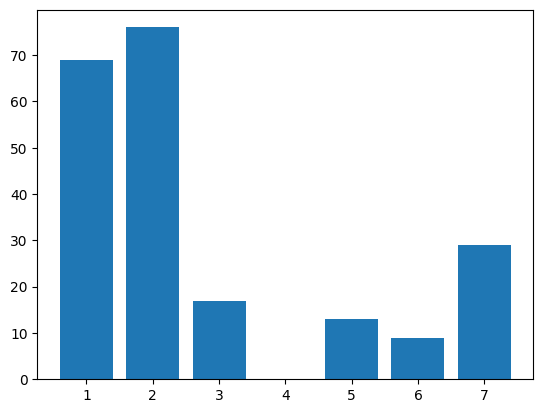

In [28]:
hist = data['1.1'].value_counts()
plt.bar(hist.index, hist);

In [32]:
data['71.78'].value_counts()

71.78
72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: count, Length: 132, dtype: int64

In [2]:
sns.countplot(x = '8.75', data = data);

NameError: name 'sns' is not defined

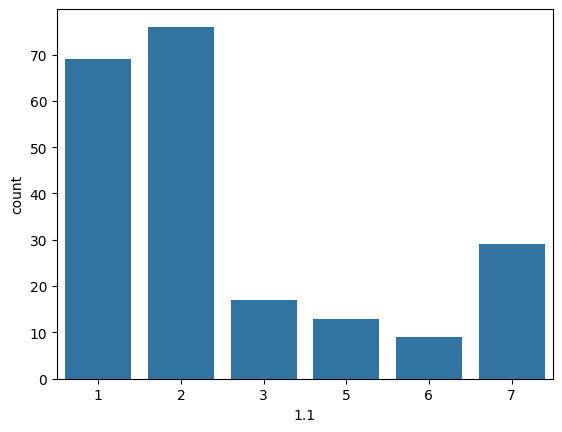

In [34]:
sns.countplot(x = '1.1', data = data);

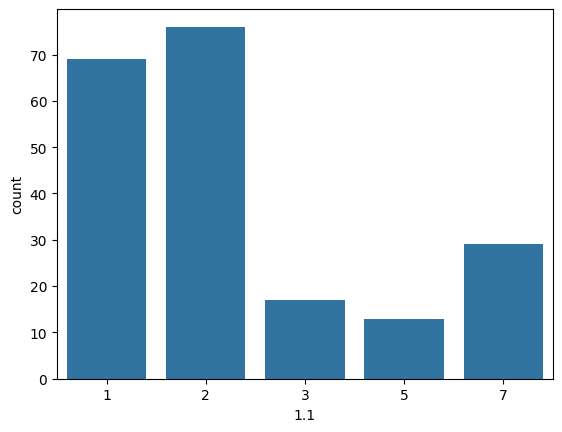

In [35]:
sns.countplot(x = data[data['1.1'].isin(data['1.1'].value_counts().head(5).index)]['1.1'], data = data);

In [39]:
feats=[f for f in data.columns if '1.1' in f]
feats

['1.10', '1.1']

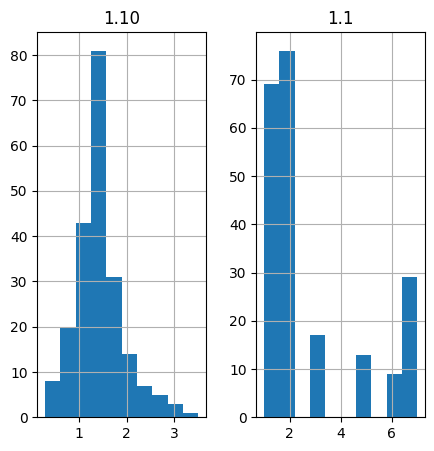

In [40]:
data[feats].hist(figsize=(5,5));

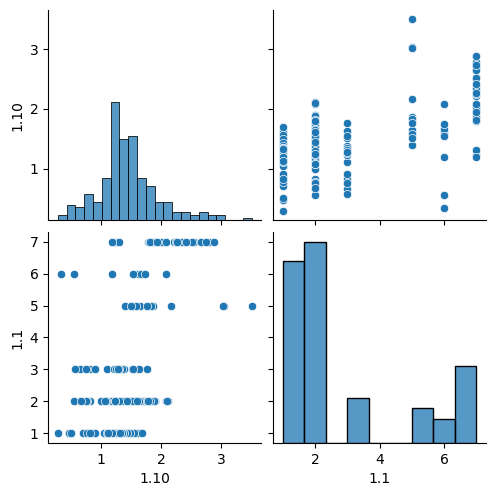

In [41]:
sns.pairplot(data[feats]);

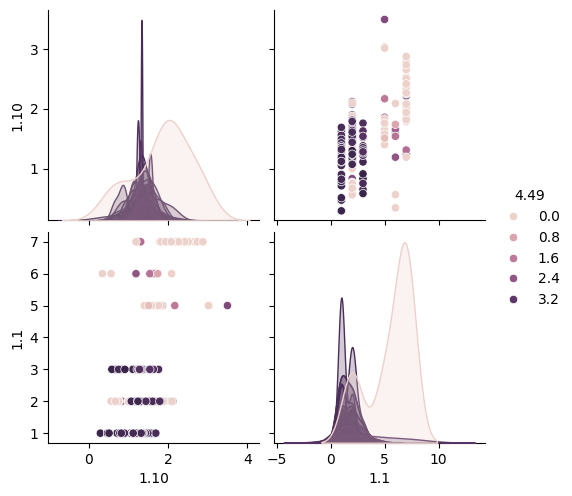

In [43]:
sns.pairplot(data[feats+['4.49']], hue='4.49');